In [19]:
# load score as df
path_knn = 'result/knn_result.csv'
path_lasso = 'result/lasso_result.csv'
path_grad_boost = 'result/grad_boost_result.csv'

import pandas as pd
df_knn = pd.read_csv(path_knn)
df_lasso = pd.read_csv(path_lasso)
df_grad_boost = pd.read_csv(path_grad_boost)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy import stats

plt.style.use('ggplot')

# set plot size
plt.rcParams['figure.figsize'] = [20, 10]
# set font size
plt.rcParams.update({'font.size': 15})

def plot(metric, distribution='kde'):
    def show_his(df, name, show_bar=False):
        counts, edges, bars = plt.hist(df['mean'], bins=50, alpha=0.5, label=name, density=True)
        # show the modules in the first bar on the plot

        if show_bar:
            plt.bar_label(bars)

        if distribution == 'kde':
            x = np.linspace(df['mean'].min(), df['mean'].max(), 100)
            kde = stats.gaussian_kde(df['mean'])
            #plt.plot(x, kde(x), label='KDE')
            # plot the kde curve with the same color as the histogram
            plt.plot(x, kde(x), color=bars[0].get_facecolor())

        elif distribution == 'norm':
            mu, std = norm.fit(df['mean'])
            y = norm.pdf(x, mu, std)
            plt.plot(x, y, label='Normal Distribution')

        

    show_his(df_knn, 'knn')
    show_his(df_lasso, 'lasso')
    show_his(df_grad_boost, 'grad_boost')

    plt.xlabel('mean percentage error')
    plt.ylabel('density')
    plt.legend(loc='upper right')
    plt.title(metric)
    plt.show()

NameError: name 'df_grad_boost' is not defined

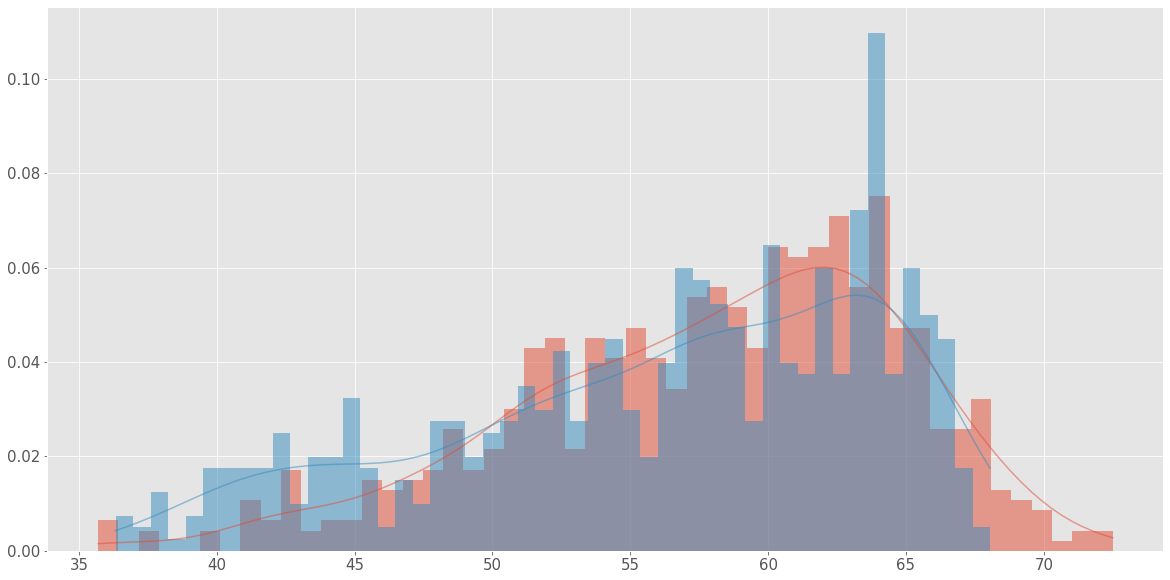

In [18]:
for metric in ['mean','glucose','weight','insulin','triglyceride']:
    plot(metric, distribution='kde')